# DengAI dataset exploration



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

### Loading data

In [2]:
train_data = pd.read_csv('../dengue_features_train.csv')
test_data = pd.read_csv('../dengue_features_test.csv')
labels = pd.read_csv('../dengue_labels_train.csv')

In [3]:
# convert dates to datetime
train_data['week_start_date'] = pd.to_datetime(train_data['week_start_date'])
test_data['week_start_date'] = pd.to_datetime(test_data['week_start_date'])

# convert all temperatures to degrees Celsius
K = 273.15
kelvin_features = ['reanalysis_max_air_temp_k',
                 'reanalysis_min_air_temp_k',
                 'reanalysis_avg_temp_k',
                 'reanalysis_air_temp_k',
                 'reanalysis_dew_point_temp_k']
for kf in kelvin_features:
    kc = kf.replace(kf[-1], 'c')
    train_data[kc] = train_data[kf]-K
    test_data[kc] = test_data[kf]-K
    
train_data = train_data.drop(kelvin_features, axis=1)
test_data = test_data.drop(kelvin_features, axis=1)

# for now, I'm not going to do anything about the NaN values, 
# as I'm not really sure yet what I'm going to do with the data later on. 

train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_avg_temp_c,reanalysis_air_temp_c,reanalysis_dew_point_temp_c
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,32.00,...,25.442857,6.900000,29.4,20.0,16.0,26.65,22.75,24.592857,24.422857,19.264286
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,17.94,...,26.714286,6.371429,31.7,22.2,8.6,27.75,23.25,25.292857,25.061429,20.801429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,26.10,...,26.714286,6.485714,32.2,22.8,41.4,27.35,24.15,25.728571,25.631429,22.284286
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,13.90,...,27.471429,6.771429,33.3,23.3,4.0,28.25,23.85,26.078571,25.837143,22.160000
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,12.20,...,28.942857,9.371429,35.0,23.9,5.8,28.75,24.35,26.514286,26.368571,22.671429


In [4]:
# make seperate dataset for each city

train_sj = train_data.loc[train_data['city']=='sj']
train_iq = train_data.loc[train_data['city']=='iq']

test_sj = test_data.loc[test_data['city']=='sj']
test_iq = test_data.loc[test_data['city']=='iq']

labels_sj = labels.loc[labels['city']=='sj']
labels_iq = labels.loc[labels['city']=='iq']

In [5]:
print(len(train_data) == len(train_sj) + len(train_iq))
print(len(test_data) == len(test_sj) + len(test_iq))
print(len(labels) == len(labels_sj) + len(labels_iq))
print(len(train_data) == len(labels))

True
True
True
True


In [6]:
train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_avg_temp_c,reanalysis_air_temp_c,reanalysis_dew_point_temp_c
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,32.00,...,25.442857,6.900000,29.4,20.0,16.0,26.65,22.75,24.592857,24.422857,19.264286
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,17.94,...,26.714286,6.371429,31.7,22.2,8.6,27.75,23.25,25.292857,25.061429,20.801429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,26.10,...,26.714286,6.485714,32.2,22.8,41.4,27.35,24.15,25.728571,25.631429,22.284286
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,13.90,...,27.471429,6.771429,33.3,23.3,4.0,28.25,23.85,26.078571,25.837143,22.160000
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,12.20,...,28.942857,9.371429,35.0,23.9,5.8,28.75,24.35,26.514286,26.368571,22.671429


In [7]:
test_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_avg_temp_c,reanalysis_air_temp_c,reanalysis_dew_point_temp_c
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,25.37,...,26.528571,7.057143,33.3,21.7,75.2,27.95,23.25,25.400000,25.342857,21.377143
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,21.83,...,26.071429,5.557143,30.0,22.2,34.3,27.65,23.55,25.407143,25.325714,21.245714
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,4.12,...,27.928571,7.785714,32.8,22.8,3.0,29.05,23.25,26.207143,26.305714,22.158571
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,2.20,...,28.057143,6.271429,33.3,24.4,0.3,29.85,23.75,26.578571,26.540000,21.252857
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,4.36,...,27.614286,7.085714,33.3,23.3,84.1,29.15,24.15,26.521429,26.630000,21.610000


In [8]:
labels_sj.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### Dengue cases versus time

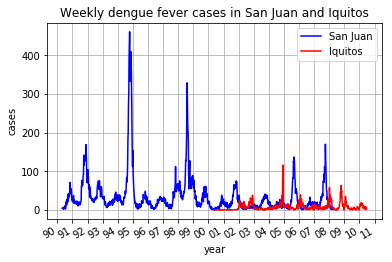

In [9]:
plt.figure()
ax = plt.gca()
plt.title('Weekly dengue fever cases in San Juan and Iquitos')
plt.plot(train_sj['week_start_date'], labels_sj['total_cases'], 'b', label='San Juan')
plt.plot(train_iq['week_start_date'], labels_iq['total_cases'], 'r', label='Iquitos')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('cases')
plt.legend()
plt.grid()
plt.show()

### Overlapping temperature data

The dataset contains various measurements of temperature. To better understand how these relate to each other I plotted them below. 

##### 'Reanalysis' versus 'station' measurements
There is definitely some visible correlation between the 'reanalysis' and 'station' measurements, however there is no exact linearity. For the San Juan data, the reanalysis measurements for min and max temperature (plotted in red and blue below) seem more moderate than the station measurements. But we can't say the same for the Iquitos data. 

Things become even more surprising when we look at the average temperature data as well (also plotted below, in green). Whereas the min and max temperature data had a wider distribution in San Juan, the average temperature data has a wider distribution in Iquitos when it comes to 'reanalysis' vs. 'station' measurements. In other words, there isn't some offset between the 'reanalysis' and 'station' measurements, nor does there seem to be an apparent relation with the measurements location or anything else.

As I can't find enough information about the measurements, I have no idea of knowing which ones would be more precisise and accurate. Also, since the measurements are not linearly dependent, I can't discard any of the data right now. Later on when I apply feature selection to optimize my model, we'll see which temperature column pops out, the reanalysis or the station measurements. Or maybe a combination of the two.

##### Difference between 'average' and 'mean' measurements
I was also curious to know if there was a difference between the reanalysis 'average' air temperature and 'mean' air temperature measurements. I've plotted them below and again, there's some correlation but no linearity. Again, we'll see what comes out after feature selection later.

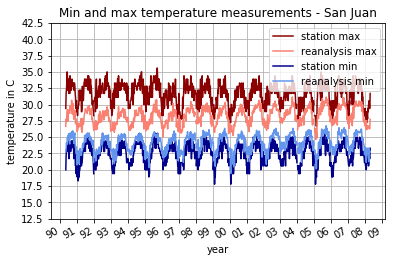

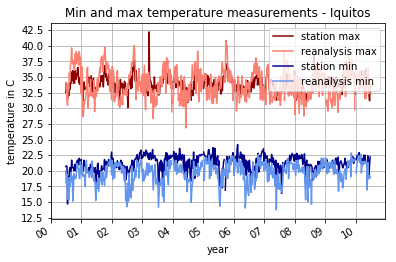

In [10]:
# Plotting min and max temperatures

plt.figure()
ax = plt.gca()
plt.title('Min and max temperature measurements - San Juan')
plt.plot(train_sj['week_start_date'], train_sj['station_max_temp_c'], 'darkred', label='station max')
plt.plot(train_sj['week_start_date'], train_sj['reanalysis_max_air_temp_c'], 'salmon', label='reanalysis max')
plt.plot(train_sj['week_start_date'], train_sj['station_min_temp_c'], 'darkblue', label='station min')
plt.plot(train_sj['week_start_date'], train_sj['reanalysis_min_air_temp_c'], 'cornflowerblue', label='reanalysis min')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.yticks(np.arange(12.5, 45.0, 2.5))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('temperature in C')
plt.legend(loc='upper right')
plt.grid()

plt.figure()
ax = plt.gca()
plt.title('Min and max temperature measurements - Iquitos')
plt.plot(train_iq['week_start_date'], train_iq['station_max_temp_c'], 'darkred', label='station max')
plt.plot(train_iq['week_start_date'], train_iq['reanalysis_max_air_temp_c'], 'salmon', label='reanalysis max')
plt.plot(train_iq['week_start_date'], train_iq['station_min_temp_c'], 'darkblue', label='station min')
plt.plot(train_iq['week_start_date'], train_iq['reanalysis_min_air_temp_c'], 'cornflowerblue', label='reanalysis min')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.yticks(np.arange(12.5, 45.0, 2.5))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('temperature in C')
plt.legend(loc='upper right')
plt.grid()


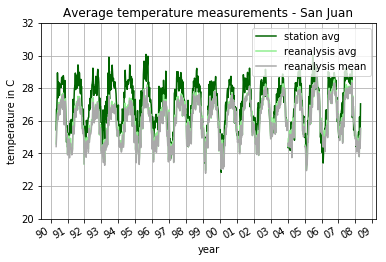

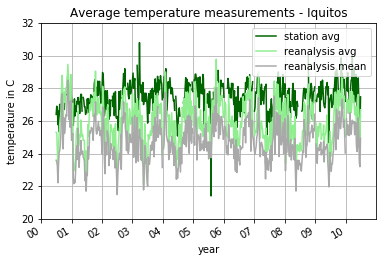

In [11]:
# Plotting average temperatures
plt.figure()
ax = plt.gca()
plt.title('Average temperature measurements - San Juan')
plt.plot(train_sj['week_start_date'], train_sj['station_avg_temp_c'], 'darkgreen', label='station avg')
plt.plot(train_sj['week_start_date'], train_sj['reanalysis_avg_temp_c'], 'lightgreen', label='reanalysis avg')
plt.plot(train_sj['week_start_date'], train_sj['reanalysis_air_temp_c'], 'darkgray', label='reanalysis mean')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.yticks(np.arange(20,34,2))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('temperature in C')
plt.legend(loc='upper right')
plt.grid()

plt.figure()
ax = plt.gca()
plt.title('Average temperature measurements - Iquitos')
plt.plot(train_iq['week_start_date'], train_iq['station_avg_temp_c'], 'darkgreen', label='station avg')
plt.plot(train_iq['week_start_date'], train_iq['reanalysis_avg_temp_c'], 'lightgreen', label='reanalysis avg')
plt.plot(train_iq['week_start_date'], train_iq['reanalysis_air_temp_c'], 'darkgray', label='reanalysis mean')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.yticks(np.arange(20,34,2))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('temperature in C')
plt.legend(loc='upper right')
plt.grid()


### Overlapping precipitation data

Just like with the temperature data, we also have various data about precipitation. Namely, the following columns:
"precipitation_amt_mm", "reanalysis_precip_amt_kg_per_m2", "reanalysis_sat_precip_amt_mm", "station_precip_mm".

Note that [kg/m2] is the same as [mm] if you take the density of water to be 1000 kg/m3.

I found that two of the columns were actually duplicates of each other, so I deleted one. Then, I plotted the remaining three columns (graphs in pink below), but just like with the temperature data, there seems to be some correlation between the data, but certainly no linearity. Again, we'll see what comes out after feature selection.

In [12]:
# "precipitation_amt_mm" and "reanalysis_sat_precip_amt_mm" look a lot alike. Are they?
a1 = sum(train_data['precipitation_amt_mm'] != train_data['reanalysis_sat_precip_amt_mm'])
l1 = len(train_data)
a2 = sum(test_data['precipitation_amt_mm'] != test_data['reanalysis_sat_precip_amt_mm'])
l2 = len(test_data)

print(a1, 'out of', l1, 'inconsistent between the columns in train data.')
print(a2, 'out of', l2, 'inconsistent between the columns in test data.')

(13, 'out of', 1456, 'inconsistent between the columns in train data.')
(2, 'out of', 416, 'inconsistent between the columns in test data.')


In [13]:
print('INCONSISTENT TRAIN_DATA VALUES FOR BOTH COLUMNS:')
print(train_data['precipitation_amt_mm'].loc[train_data['precipitation_amt_mm'] != train_data['reanalysis_sat_precip_amt_mm']])
print(train_data['reanalysis_sat_precip_amt_mm'].loc[train_data['precipitation_amt_mm'] != train_data['reanalysis_sat_precip_amt_mm']])
print('')
print('INCONSISTENT TEST_DATA VALUES FOR BOTH COLUMNS:')
print(test_data['precipitation_amt_mm'].loc[test_data['precipitation_amt_mm'] != test_data['reanalysis_sat_precip_amt_mm']])
print(test_data['reanalysis_sat_precip_amt_mm'].loc[test_data['precipitation_amt_mm'] != test_data['reanalysis_sat_precip_amt_mm']])

INCONSISTENT TRAIN_DATA VALUES FOR BOTH COLUMNS:
87     NaN
93     NaN
94     NaN
95     NaN
139    NaN
399    NaN
451    NaN
711    NaN
763    NaN
1118   NaN
1170   NaN
1378   NaN
1430   NaN
Name: precipitation_amt_mm, dtype: float64
87     NaN
93     NaN
94     NaN
95     NaN
139    NaN
399    NaN
451    NaN
711    NaN
763    NaN
1118   NaN
1170   NaN
1378   NaN
1430   NaN
Name: reanalysis_sat_precip_amt_mm, dtype: float64

INCONSISTENT TEST_DATA VALUES FOR BOTH COLUMNS:
35   NaN
87   NaN
Name: precipitation_amt_mm, dtype: float64
35   NaN
87   NaN
Name: reanalysis_sat_precip_amt_mm, dtype: float64


So actually, the columns are completely the same. Let's delete one of them.

In [14]:
train_data = train_data.drop(['reanalysis_sat_precip_amt_mm'], axis=1)
test_data = test_data.drop(['reanalysis_sat_precip_amt_mm'], axis=1)

train_sj = train_sj.drop(['reanalysis_sat_precip_amt_mm'], axis=1)
test_sj = test_sj.drop(['reanalysis_sat_precip_amt_mm'], axis=1)
train_iq = train_iq.drop(['reanalysis_sat_precip_amt_mm'], axis=1)
test_iq = test_iq.drop(['reanalysis_sat_precip_amt_mm'], axis=1)

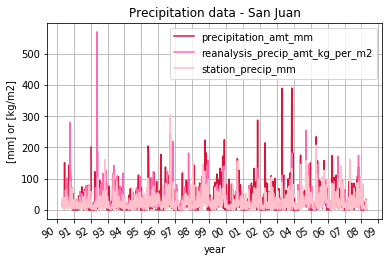

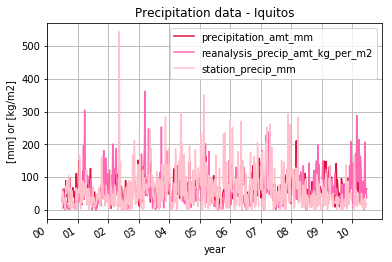

In [15]:
# Now plotting the three remaining precipitation data columns:

plt.figure()
ax = plt.gca()
plt.title('Precipitation data - San Juan')
plt.plot(train_sj['week_start_date'], train_sj['precipitation_amt_mm'], 'crimson', label='precipitation_amt_mm')
plt.plot(train_sj['week_start_date'], train_sj['reanalysis_precip_amt_kg_per_m2'], 'hotpink', label='reanalysis_precip_amt_kg_per_m2')
plt.plot(train_sj['week_start_date'], train_sj['station_precip_mm'], 'pink', label='station_precip_mm')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.yticks(np.arange(0,600,100))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('[mm] or [kg/m2]')
plt.legend(loc='upper right')
plt.grid()

plt.figure()
ax = plt.gca()
plt.title('Precipitation data - Iquitos')
plt.plot(train_iq['week_start_date'], train_iq['precipitation_amt_mm'], 'crimson', label='precipitation_amt_mm')
plt.plot(train_iq['week_start_date'], train_iq['reanalysis_precip_amt_kg_per_m2'], 'hotpink', label='reanalysis_precip_amt_kg_per_m2')
plt.plot(train_iq['week_start_date'], train_iq['station_precip_mm'], 'pink', label='station_precip_mm')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.yticks(np.arange(0,600,100))
plt.gcf().autofmt_xdate()
plt.xlabel('year')
plt.ylabel('[mm] or [kg/m2]')
plt.legend(loc='upper right')
plt.grid()


### Correlations in the data

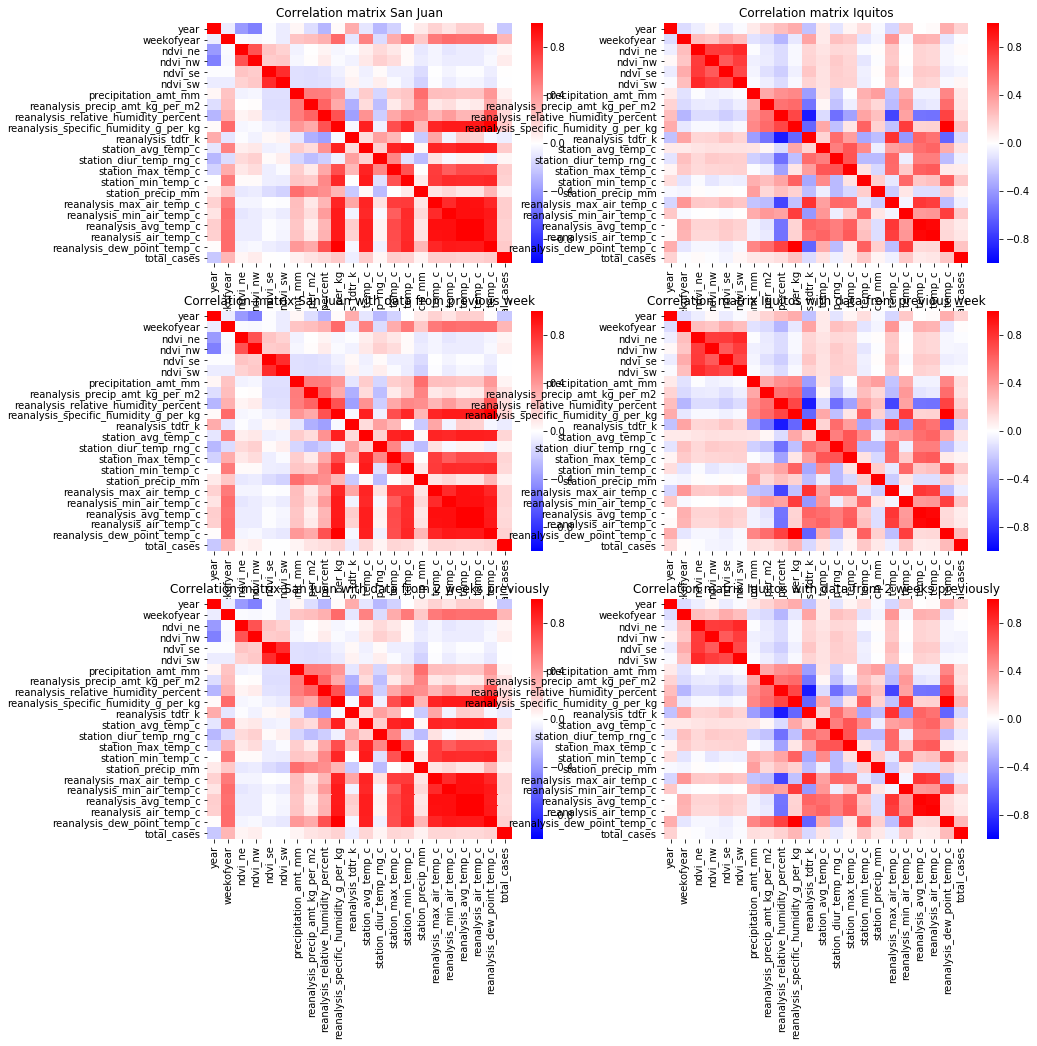

In [50]:
sj_corr = train_sj.join(labels_sj['total_cases']).corr()
iq_corr = train_iq.join(labels_iq['total_cases']).corr()

sj_shift1 = train_sj.join(labels_sj['total_cases'].shift(1)).corr()
iq_shift1 = train_iq.join(labels_iq['total_cases'].shift(1)).corr()

sj_shift2 = train_sj.join(labels_sj['total_cases'].shift(2)).corr()
iq_shift2 = train_iq.join(labels_iq['total_cases'].shift(2)).corr()

plt.figure(figsize=(15,15))
plt.subplot(321)
sns.heatmap(sj_corr, vmin=-1.0, vmax=1.0, cmap="bwr")
plt.title('Correlation matrix San Juan')
plt.subplot(322)
sns.heatmap(iq_corr, vmin=-1.0, vmax=1.0, cmap="bwr")
plt.title('Correlation matrix Iquitos')

plt.subplot(323)
sns.heatmap(sj_shift1, vmin=-1.0, vmax=1.0, cmap="bwr")
plt.title('Correlation matrix San Juan with data from previous week')
plt.subplot(324)
sns.heatmap(iq_shift1, vmin=-1.0, vmax=1.0, cmap="bwr")
plt.title('Correlation matrix Iquitos with data from previous week')

plt.subplot(325)
sns.heatmap(sj_shift1, vmin=-1.0, vmax=1.0, cmap="bwr")
plt.title('Correlation matrix San Juan with data from 2 weeks previously')
plt.subplot(326)
sns.heatmap(iq_shift1, vmin=-1.0, vmax=1.0, cmap="bwr")
plt.title('Correlation matrix Iquitos with data from 2 weeks previously')

plt.show()


### Save data to new file

In [16]:
train_data.to_csv('../train_data.csv')
test_data.to_csv('../test_data.csv')